In [57]:
import pandas as pd
import numpy as np
import pyhomogeneity as hg
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip 
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from linearmodels.datasets import wage



In [38]:
dmat1=pd.read_excel('btcprice.xlsx') 

dmat1.head()  

dmat1.describe()

,Open*,High,Low,Close,Volume,Market Cap,hash rate,difficulty,lcose,lvolume,lmarketcap,lhashrate,ldiff
count,2130.000000,2130.000000,2130.000000,2130.000000,2.130000e+03,2.130000e+03,2.130000e+03,2.130000e+03,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,11759.639901,12094.375545,11404.055925,11788.439408,1.712527e+10,2.151597e+11,5.963014e+07,8.246992e+12,3.730939,9.629664,10.968399,7.390870,12.524758
std,14976.382126,15426.740731,14487.609121,15014.021381,2.095505e+10,2.826206e+11,5.436316e+07,7.558515e+12,0.601009,1.005647,0.626207,0.734162,0.741171
min,365.070000,374.950000,354.910000,364.330000,2.851400e+07,5.496598e+09,6.930894e+05,1.038803e+11,2.561495,7.455058,9.740094,5.840789,11.016533
25%,2492.880000,2562.272500,2378.505000,2493.005000,1.074637e+09,4.082195e+10,4.976738e+06,6.796687e+11,3.396721,9.031260,10.610891,6.696945,11.832297
50%,7229.510000,7388.280000,7076.935000,7241.050000,7.920519e+09,1.275382e+11,4.531579e+07,6.275435e+12,3.859802,9.898753,11.105640,7.656249,12.797611
75%,10797.552500,11052.652500,10509.222500,10800.497500,2.747029e+10,1.929545e+11,1.087816e+08,1.546610e+13,4.033444,10.438863,11.285455,8.036555,13.189381
max,66002.230000,66930.390000,63610.670000,65992.840000,3.509679e+11,1.243927e+12,1.985140e+08,2.504649e+13,4.819497,11.545267,12.094795,8.297791,13.398747


In [39]:
data = pd.DataFrame(dmat1)
data

,Date,Open*,High,Low,Close,Volume,Market Cap,hash rate,difficulty,lcose,lvolume,lmarketcap,lhashrate,ldiff
0,2021-10-30,62239.36,62330.15,60918.39,61888.83,32157938616,1167178054167,1.547372e+08,2.008246e+13,4.791612,10.507288,12.067137,8.189595,13.302817
1,2021-10-29,60624.87,62927.61,60329.97,62227.96,36856881767,1173512442368,1.547372e+08,2.008246e+13,4.793986,10.566519,12.069488,8.189595,13.302817
2,2021-10-28,58470.73,62128.63,58206.92,60622.14,45257083247,1143165999365,1.547372e+08,2.008246e+13,4.782631,10.655687,12.058109,8.189595,13.302817
3,2021-10-27,60352.00,61435.18,58208.19,58482.39,43657076893,1102757767323,1.567338e+08,2.008246e+13,4.767025,10.640055,12.042480,8.195163,13.302817
4,2021-10-26,63032.76,63229.03,59991.16,60363.79,34878965587,1138177770430,1.567338e+08,2.008246e+13,4.780776,10.542564,12.056210,8.195163,13.302817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,2016-01-05,433.07,434.18,429.68,431.96,34522600,6500393256,7.022931e+05,1.038803e+11,2.635444,7.538103,9.812940,5.846518,11.016533
2126,2016-01-04,430.06,434.52,429.08,433.09,38477500,6515713340,7.022931e+05,1.038803e+11,2.636578,7.585207,9.813962,5.846518,11.016533
2127,2016-01-03,433.58,433.74,424.71,430.01,39633800,6467429942,7.694240e+05,1.038803e+11,2.633479,7.598066,9.810732,5.886166,11.016533
2128,2016-01-02,434.62,436.06,431.87,433.44,30096600,6517390487,7.694240e+05,1.038803e+11,2.636929,7.478517,9.814074,5.886166,11.016533


In [55]:
data = pd.DataFrame(dmat1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2130 non-null   datetime64[ns]
 1   Open*       2130 non-null   float64       
 2   High        2130 non-null   float64       
 3   Low         2130 non-null   float64       
 4   Close       2130 non-null   float64       
 5   Volume      2130 non-null   int64         
 6   Market Cap  2130 non-null   int64         
 7   hash rate   2130 non-null   float64       
 8   difficulty  2130 non-null   float64       
 9   lcose       2130 non-null   float64       
 10  lvolume     2130 non-null   float64       
 11  lmarketcap  2130 non-null   float64       
 12  lhashrate   2130 non-null   float64       
 13  ldiff       2130 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 233.1 KB


In [58]:
# Homogeneity Test

result = hg.pettitt_test(data.lcose)
print(result)

Pettitt_Test(h=True, cp=902, p=0.0, U=974830.0, avg=mean(mu1=4.2157399860718625, mu2=3.374838468622542))


In [40]:
dmat2 = dmat1[['Date','Close','Volume','Market Cap','hash rate', 'difficulty','lcose','lvolume','lmarketcap', 'lhashrate', 'ldiff' ]]
dmat2


,Date,Close,Volume,Market Cap,hash rate,difficulty,lcose,lvolume,lmarketcap,lhashrate,ldiff
0,2021-10-30,61888.83,32157938616,1167178054167,1.547372e+08,2.008246e+13,4.791612,10.507288,12.067137,8.189595,13.302817
1,2021-10-29,62227.96,36856881767,1173512442368,1.547372e+08,2.008246e+13,4.793986,10.566519,12.069488,8.189595,13.302817
2,2021-10-28,60622.14,45257083247,1143165999365,1.547372e+08,2.008246e+13,4.782631,10.655687,12.058109,8.189595,13.302817
3,2021-10-27,58482.39,43657076893,1102757767323,1.567338e+08,2.008246e+13,4.767025,10.640055,12.042480,8.195163,13.302817
4,2021-10-26,60363.79,34878965587,1138177770430,1.567338e+08,2.008246e+13,4.780776,10.542564,12.056210,8.195163,13.302817
...,...,...,...,...,...,...,...,...,...,...,...
2125,2016-01-05,431.96,34522600,6500393256,7.022931e+05,1.038803e+11,2.635444,7.538103,9.812940,5.846518,11.016533
2126,2016-01-04,433.09,38477500,6515713340,7.022931e+05,1.038803e+11,2.636578,7.585207,9.813962,5.846518,11.016533
2127,2016-01-03,430.01,39633800,6467429942,7.694240e+05,1.038803e+11,2.633479,7.598066,9.810732,5.886166,11.016533
2128,2016-01-02,433.44,30096600,6517390487,7.694240e+05,1.038803e+11,2.636929,7.478517,9.814074,5.886166,11.016533


In [44]:
dmat2.describe()

,Close,Volume,Market Cap,hash rate,difficulty,lcose,lvolume,lmarketcap,lhashrate,ldiff
count,2130.000000,2.130000e+03,2.130000e+03,2.130000e+03,2.130000e+03,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,11788.439408,1.712527e+10,2.151597e+11,5.963014e+07,8.246992e+12,3.730939,9.629664,10.968399,7.390870,12.524758
std,15014.021381,2.095505e+10,2.826206e+11,5.436316e+07,7.558515e+12,0.601009,1.005647,0.626207,0.734162,0.741171
min,364.330000,2.851400e+07,5.496598e+09,6.930894e+05,1.038803e+11,2.561495,7.455058,9.740094,5.840789,11.016533
25%,2493.005000,1.074637e+09,4.082195e+10,4.976738e+06,6.796687e+11,3.396721,9.031260,10.610891,6.696945,11.832297
50%,7241.050000,7.920519e+09,1.275382e+11,4.531579e+07,6.275435e+12,3.859802,9.898753,11.105640,7.656249,12.797611
75%,10800.497500,2.747029e+10,1.929545e+11,1.087816e+08,1.546610e+13,4.033444,10.438863,11.285455,8.036555,13.189381
max,65992.840000,3.509679e+11,1.243927e+12,1.985140e+08,2.504649e+13,4.819497,11.545267,12.094795,8.297791,13.398747


--------------------------------------- Key Variables------------------------------------------


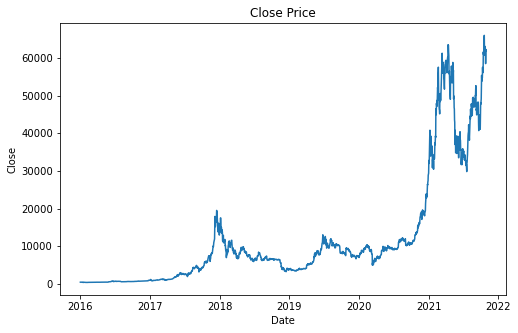

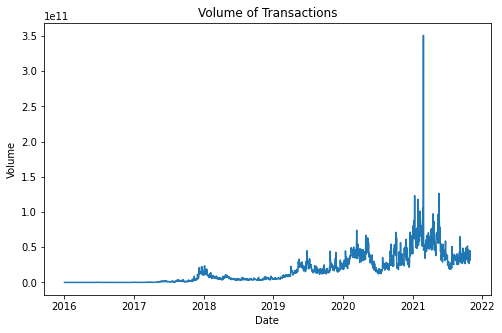

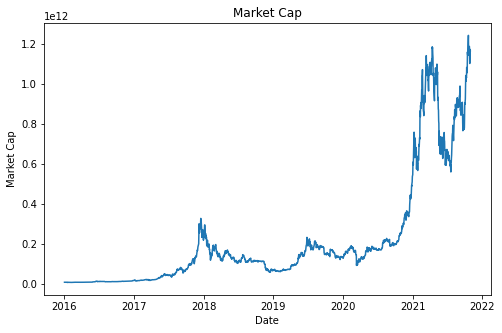

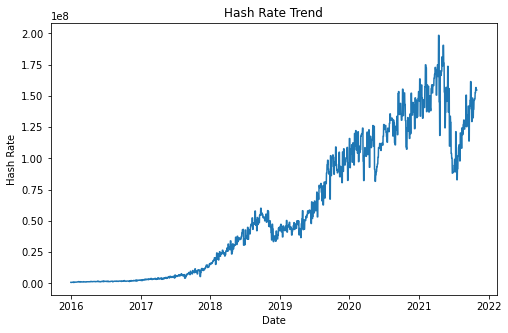

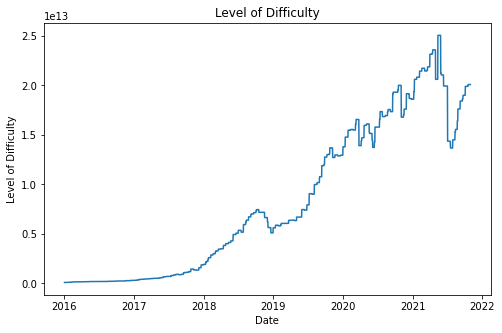

--------------------------------------- Log of Key Variables------------------------------------------


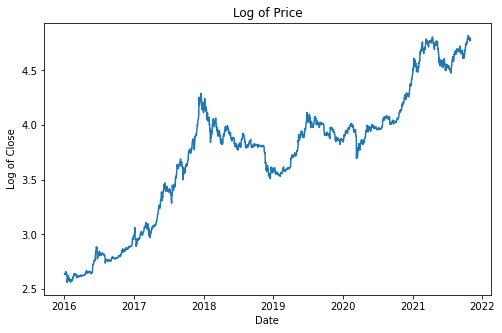

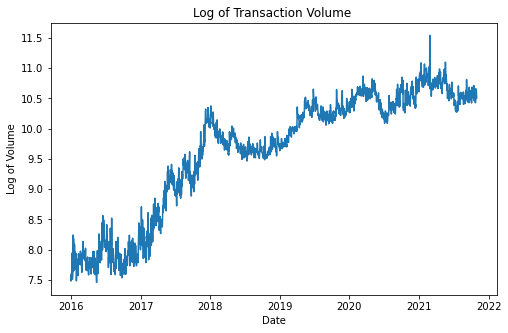

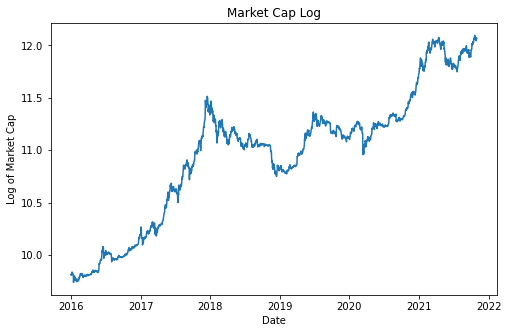

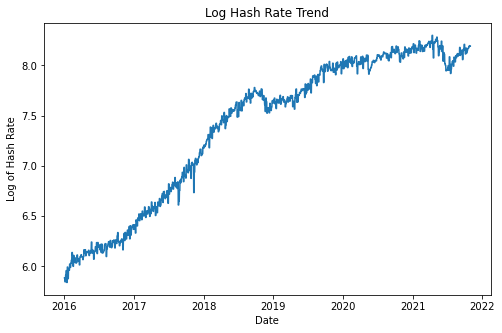

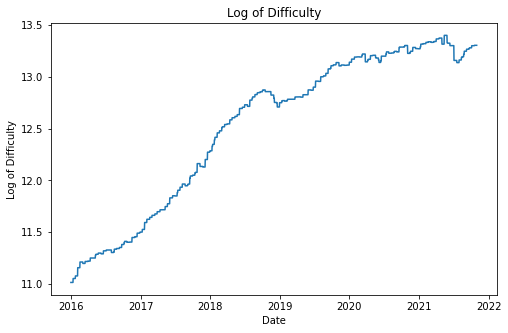

In [49]:
print ("--------------------------------------- Key Variables------------------------------------------")

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['Close'] )  
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Price')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['Volume'] )  
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Transactions')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['Market Cap'] )  
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Cap')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['hash rate'] )  
plt.xlabel('Date')
plt.ylabel('Hash Rate')
plt.title('Hash Rate Trend')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['difficulty'] )  
plt.xlabel('Date')
plt.ylabel('Level of Difficulty')
plt.title('Level of Difficulty')
plt.show()


print ("--------------------------------------- Log of Key Variables------------------------------------------")

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['lcose'] )  
plt.xlabel('Date')
plt.ylabel('Log of Close')
plt.title('Log of Price')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['lvolume'] )  
plt.xlabel('Date')
plt.ylabel('Log of Volume')
plt.title('Log of Transaction Volume ')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['lmarketcap'] )  
plt.xlabel('Date')
plt.ylabel('Log of Market Cap')
plt.title('Market Cap Log')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['lhashrate'] )  
plt.xlabel('Date')
plt.ylabel('Log of Hash Rate')
plt.title('Log Hash Rate Trend')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(dmat2['Date'],dmat2['ldiff'] )  
plt.xlabel('Date')
plt.ylabel('Log of Difficulty')
plt.title('Log of Difficulty')
plt.show()


---------------------------------Distributions of Key Variables---------------------------


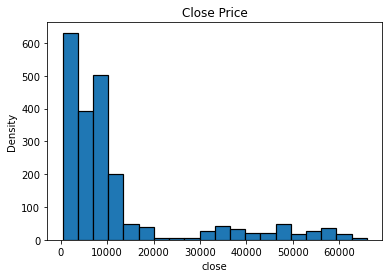

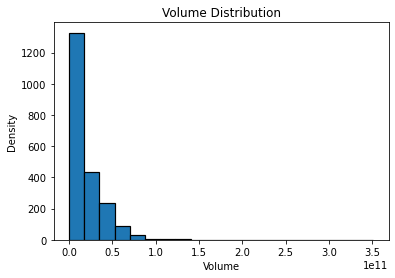

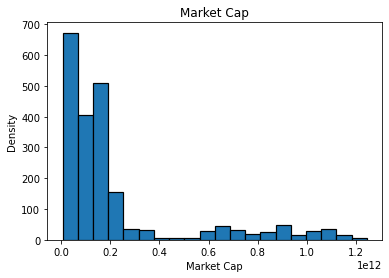

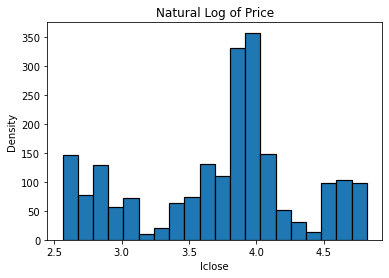

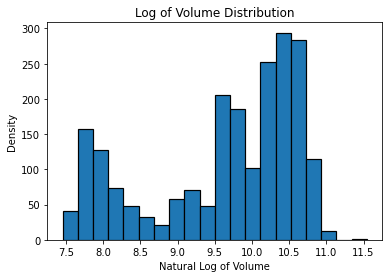

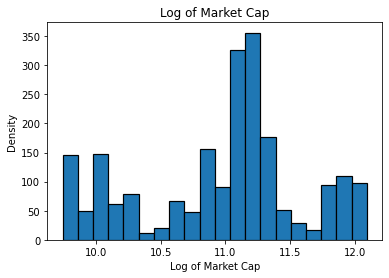

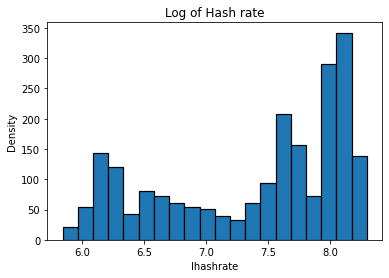

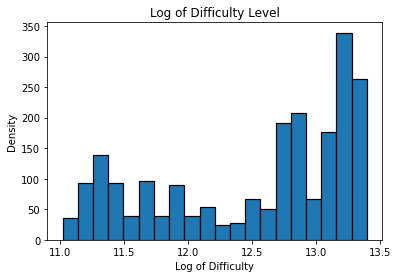

---------------------------------End of Distributions of Key Variables---------------------------


In [43]:
print ("---------------------------------Distributions of Key Variables---------------------------")


plt.figure(1)
plt.hist(dmat2['Close'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('close')
plt.ylabel('Density')
plt.title('Close Price')
plt.show()

plt.figure(1)
plt.hist(dmat2['Volume'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('Volume')
plt.ylabel('Density')
plt.title('Volume Distribution')
plt.show()


plt.figure(1)
plt.hist(dmat2['Market Cap'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Market Cap')
plt.ylabel('Density')
plt.title('Market Cap')
plt.show()

plt.figure(1)
plt.hist(dmat2['lcose'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('lclose')
plt.ylabel('Density')
plt.title('Natural Log of Price')
plt.show()

plt.figure(1)
plt.hist(dmat2['lvolume'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('Natural Log of Volume')
plt.ylabel('Density')
plt.title('Log of Volume Distribution')
plt.show()


plt.figure(1)
plt.hist(dmat2['lmarketcap'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Log of Market Cap')
plt.ylabel('Density')
plt.title('Log of Market Cap')
plt.show()

plt.figure(1)
plt.hist(dmat2['lhashrate'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('lhashrate')
plt.ylabel('Density')
plt.title('Log of Hash rate')
plt.show()


plt.figure(1)
plt.hist(dmat2['ldiff'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('Log of Difficulty')
plt.ylabel('Density')
plt.title('Log of Difficulty Level')
plt.show()

print ("---------------------------------End of Distributions of Key Variables---------------------------")



/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


          acf      pacf              Q  p-val
0    0.998069  0.998538    2124.773642    0.0
1    0.996159  0.005738    4242.416153    0.0
2    0.994229 -0.007911    6352.852615    0.0
3    0.992324  0.007161    8456.196712    0.0
4    0.990377 -0.015068   10552.284164    0.0
..        ...       ...            ...    ...
725 -0.017888  0.026628  354575.309003    0.0
726 -0.017698  0.024397  354576.322775    0.0
727 -0.017552 -0.018796  354577.320611    0.0
728 -0.017375  0.013964  354578.299180    0.0
729 -0.017274 -0.028231  354579.267071    0.0

[730 rows x 4 columns]


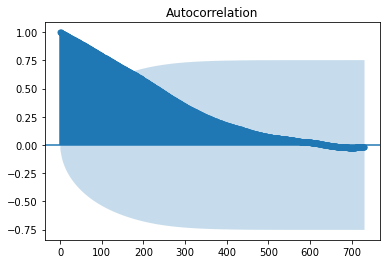

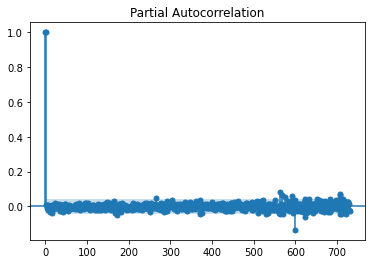

In [53]:
# The Correlogram of log prices
import statsmodels.tsa.api as smt


acf,q,pval=smt.acf(dmat2['lcose'], nlags=730, qstat=True)
pacf = smt.pacf(dmat2['lcose'],nlags=730)

correlogram=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(correlogram)

# Plotting the correlograms 
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(dmat2["lcose"].values.squeeze(), lags=730) # The ACF
plt.show()

sm.graphics.tsa.plot_pacf(dmat2["lcose"].values.squeeze(), lags=730) # The PACF
plt.show()

---------------------------------Scatter Plots:Log Wage against Other variables ----------------


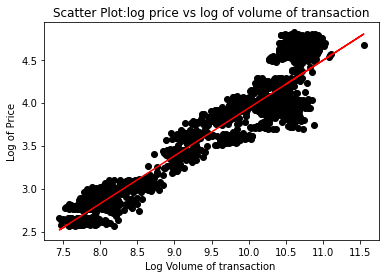

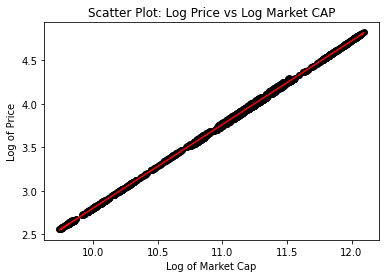

---------------------------------End of Scatter Plots ---------------------------


In [46]:
print ("---------------------------------Scatter Plots:Log Wage against Other variables ----------------")

plt.figure(2)
plt.scatter(dmat2['lvolume'], dmat2['lcose'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(dmat2['lvolume'], dmat2['lcose'], 1)  # m = slope, b=intercept
plt.plot(dmat2['lvolume'], m*dmat2['lvolume'] + b, color='red')

# end of option


plt.xlabel('Log Volume of transaction ')
plt.ylabel('Log of Price')
plt.title('Scatter Plot:log price vs log of volume of transaction')
plt.show()



plt.figure(2)
plt.scatter(dmat2['lmarketcap'], dmat2['lcose'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(dmat2['lmarketcap'], dmat2['lcose'], 1)  # m = slope, b=intercept
plt.plot(dmat2['lmarketcap'], m*dmat2['lmarketcap'] + b, color='red')

# end of option


plt.xlabel('Log of Market Cap')
plt.ylabel('Log of Price')
plt.title('Scatter Plot: Log Price vs Log Market CAP')
plt.show()

print ("---------------------------------End of Scatter Plots ---------------------------")


In [54]:
dmat2.corr()

,Close,Volume,Market Cap,hash rate,difficulty,lcose,lvolume,lmarketcap,lhashrate,ldiff
Close,1.000000,0.729461,0.999785,0.744789,0.749653,0.794041,0.605942,0.791547,0.594351,0.596152
Volume,0.729461,1.000000,0.730119,0.819462,0.835854,0.710769,0.719867,0.714746,0.682432,0.687788
Market Cap,0.999785,0.730119,1.000000,0.747567,0.752674,0.787264,0.600010,0.785016,0.591221,0.593222
hash rate,0.744789,0.819462,0.747567,1.000000,0.983847,0.814561,0.821488,0.822273,0.878452,0.875806
difficulty,0.749653,0.835854,0.752674,0.983847,1.000000,0.816900,0.824257,0.824718,0.872812,0.879583
lcose,0.794041,0.710769,0.787264,0.814561,0.816900,1.000000,0.932694,0.999828,0.905043,0.904911
lvolume,0.605942,0.719867,0.600010,0.821488,0.824257,0.932694,1.000000,0.936785,0.959456,0.960127
lmarketcap,0.791547,0.714746,0.785016,0.822273,0.824718,0.999828,0.936785,1.000000,0.911720,0.911718
lhashrate,0.594351,0.682432,0.591221,0.878452,0.872812,0.905043,0.959456,0.911720,1.000000,0.997577
ldiff,0.596152,0.687788,0.593222,0.875806,0.879583,0.904911,0.960127,0.911718,0.997577,1.000000


In [7]:
# Next is running a linear regression using OLS estimator


formula='lcose ~ lvolume + lmarketcap'  # linear equation, the first variable is dependent and the rest are explanatory
# Please pay attenting to the wording used to describe educ and hours: they are explanatory and not independent. 

results=smf.ols(formula, dmat2).fit(cov_type='HAC',cov_kwds={'maxlags':1, 'use_correction':True})  

# Available options: 
#.fit(cov_type='HC1') to correct for heteroskedasticity
#.fit(cov_type='HAC',cov_kwds={'maxlags':1, 'use_correction':True}) to correct for both heteroskedasticity and autocorrelation


glm1=smf.glm(formula, dmat2,family=sm.families.Gaussian())
glm_out = glm1.fit()


print('******************* Generalised Linear Regression Output ***********************')
print(glm_out.summary())


print('******************* Linear Regression Output **********************************')

print(results.summary())

print('*******************************************************************************')



******************* Generalised Linear Regression Output ***********************
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  lcose   No. Observations:                 2130
Model:                            GLM   Df Residuals:                     2127
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      7.8876e-05
Method:                          IRLS   Log-Likelihood:                 7040.9
Date:                Wed, 10 Nov 2021   Deviance:                      0.16777
Time:                        11:53:33   Pearson chi2:                    0.168
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [8]:
#The following is optional. You may finn testing restrictions very useful when doing empirical work
# Example:Suppose now you have claim that education should increase the wage rate by 1%.
# We wish to test this claim using the model above.
# We have to run linear restriction test using F test. Here is how is it done.

hypotheses='lvolume=0.01' # set educ slope to equal 10%. Think why is set this way?  

f_test=results.f_test(hypotheses) # call the results and use them to compute the F test


print('*******************Hypothesis Test**********************************')
print("testing the restriction lvolume=0.01 =", f_test)
print('********************************************************************')





*******************Hypothesis Test**********************************
testing the restriction lvolume=0.01 = <F test: F=array([[2222.30575419]]), p=0.0, df_denom=2.13e+03, df_num=1>
********************************************************************


---------------------------------Plot of Residuals ---------------------------
Use the plot to visually inspect the presence of autocorrelation


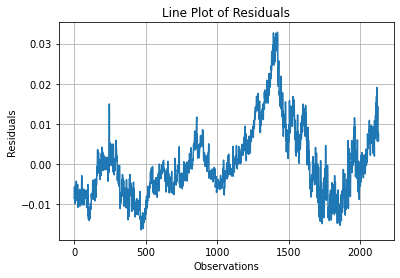

The plot of residuals shows a random patterns across individuals. This may suggest the presence of no autocorrelation
---------------------------------End of Plot of Residuals ---------------------------


In [9]:
# Let's now learn about the properties of the residuals
# Begin with plotting residuals 
# The plot of residuals against observations will help to detect the presence of autocorrelation in the data

print ("---------------------------------Plot of Residuals ---------------------------")
print ("Use the plot to visually inspect the presence of autocorrelation")
plt.figure(1)
plt.plot(results.resid) 
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Line Plot of Residuals')
plt.grid(True) # I have added this for me to be able to accurately see the graph
plt.show()

print("The plot of residuals shows a random patterns across individuals. This may suggest the presence of no autocorrelation")
print ("---------------------------------End of Plot of Residuals ---------------------------")



In [59]:
# Setting up the model using 2SLS
dependent = np.log(dmat2.Close).iloc[:2000]
exog = sm.add_constant(dmat2.lvolume).iloc[:2000]
endog = dmat2.lmarketcap.iloc[:2000]
instruments = dmat2['lcose'].iloc[130:]

mod = IV2SLS(dependent, exog, endog, instruments)
iv_output = mod.fit(cov_type='unadjusted')
print(iv_output)

#  Available cov_type options:
# ‘unadjusted’, ‘homoskedastic’ - Assumes moment conditions are homoskedastic
# ‘robust’, ‘heteroskedastic’ - Allows for heteroskedasticity by not autocorrelation
# ‘kernel’ - Allows for heteroskedasticity and autocorrelation
# ‘cluster’ - Allows for one-way cluster dependence

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  Close   R-squared:                      0.9996
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9996
No. Observations:                2000   F-statistic:                 4.834e+06
Date:                Sun, Nov 14 2021   P-value (F-stat)                0.0000
Time:                        06:04:53   Distribution:                  chi2(2)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -15.673     0.0244    -643.46     0.0000     -15.721     -15.625
lvolume       -0.0124     0.0025    -4.8891     0.00

In [11]:
# Next is running a linear regression using OLS estimator


formula='lcose ~ lvolume + lmarketcap + lhashrate + ldiff'  # linear equation, the first variable is dependent and the rest are explanatory
# Please pay attenting to the wording used to describe educ and hours: they are explanatory and not independent. 

results=smf.ols(formula, dmat2).fit(cov_type='HAC',cov_kwds={'maxlags':1, 'use_correction':True})  

# Available options: 
#.fit(cov_type='HC1') to correct for heteroskedasticity
#.fit(cov_type='HAC',cov_kwds={'maxlags':1, 'use_correction':True}) to correct for both heteroskedasticity and autocorrelation


glm1=smf.glm(formula, dmat2,family=sm.families.Gaussian())
glm_out = glm1.fit()


print('******************* Generalised Modified Linear Regression Output ***********************')
print(glm_out.summary())


print('******************* Linear Regression Output **********************************')

print(results.summary())

print('*******************************************************************************')



******************* Generalised Modified Linear Regression Output ***********************
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  lcose   No. Observations:                 2130
Model:                            GLM   Df Residuals:                     2125
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                      2.9316e-05
Method:                          IRLS   Log-Likelihood:                 8096.0
Date:                Wed, 10 Nov 2021   Deviance:                     0.062297
Time:                        11:54:14   Pearson chi2:                   0.0623
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------